# AirBNB Price Prediction and Recommender for Comunidad Valenciana

This notebook focuses on preprocessing and compiling the data to prepare it for analysis and modeling

### Reading and describing Data

In [64]:
import pandas as pd
import os

folder_name = "Datasets"
file_name = "Parque de Viviendas.csv"
file_path = os.path.join(folder_name, file_name)

# Use pd.read_excel to read the Excel file
df1 = pd.read_csv(file_path)


folder_name = "Datasets"
file_name = "Actividad Mensual Viviendas.csv"
file_path = os.path.join(folder_name, file_name)

# Use pd.read_excel to read the Excel file
df2 = pd.read_csv(file_path)


In [65]:


df1['supply_id'] = df1['supply_id'].str[6:]

In [66]:

df = pd.merge(df1, df2[['supply_id', 'date_in', 'adr_usd', 'occupancy_rate', 'revenue_usd', 'n_bookings', 'reservation_days', 'available_days', 'blocked_days']], on='supply_id', how='inner')

In [67]:
df.head()

,supply_id,ad_title,date_in_x,last_scrapped_date,currency,adr_usd_x,adr_native,anual_revenue_usd,anual_revenue_native,occupancy_rate_ltm,...,geo_id,fecha,date_in_y,adr_usd_y,occupancy_rate,revenue_usd,n_bookings,reservation_days,available_days,blocked_days
0,ab-15380248,Villa Anngo,2016-10-04,2021-07-23,EUR,417.41,353.53,12105,10252,0.296,...,ES-010-003-082-003-001-001,2021-07-27-,2019-04-01,221.34,0.567,3762.86,3,17,13,0
1,ab-15380248,Villa Anngo,2016-10-04,2021-07-23,EUR,417.41,353.53,12105,10252,0.296,...,ES-010-003-082-003-001-001,2021-07-27-,2017-10-01,192.36,0.581,3462.56,3,18,13,0
2,ab-15380248,Villa Anngo,2016-10-04,2021-07-23,EUR,417.41,353.53,12105,10252,0.296,...,ES-010-003-082-003-001-001,2021-07-27-,2017-08-01,476.25,0.710,10477.57,5,22,9,0
3,ab-15380248,Villa Anngo,2016-10-04,2021-07-23,EUR,417.41,353.53,12105,10252,0.296,...,ES-010-003-082-003-001-001,2021-07-27-,2017-06-01,306.65,0.633,5826.33,4,19,11,0
4,ab-15380248,Villa Anngo,2016-10-04,2021-07-23,EUR,417.41,353.53,12105,10252,0.296,...,ES-010-003-082-003-001-001,2021-07-27-,2018-06-01,274.18,0.833,6854.40,2,25,5,0


In [69]:
(df['adr_usd_y'] < 200).mean() * 100

94.34742827033512


### Description of each column:
- **Supply_ID**: Identifier for each reservation.
- **Date_in**: Start date of the stay.
- **Last_scrapped_date**: The last date our scrapers located the vacation rental listing.
- **Adr_usd**: Average Daily Rate in USD (Total Revenue for a reservation / Number of booked nights).
- **Annual_revenue_usd**: Last twelve months (LTM) or total monthly listing revenue in USD.
- **N_rooms**: Number of bedrooms in a vacation rental listing.
- **N_baths**: Number of bathrooms in a vacation rental listing.
- **Max_guests**: The maximum number of guests the vacation rental property can accommodate.
- **Calendar_last_updated**: The last time the host updated their calendar.
- **Deposit_usd**: Security deposit in US dollars.
- **Cleaning_fee_usd**: Cleaning fee charged per reservation in USD.
- **Extra_people_fee_usd**: Extra people fee in US dollars.
- **Min_stay**: The default minimum night stay required by the host.
- **N_photos**: Number of photos in a vacation rental listing.
- **Is_instantbookable**: True or false depending on whether the vacation rental property can be booked without any host/guest communication.
- **Lat**: Latitude of the vacation rental property.
- **Lon**: Longitude of the vacation rental property.
- **Rating**: Average guest rating of the value of the property.
- **Is_superhost**: True or False depending on whether the host is a Superhost on Airbnb.
- **Additional_fields**
- **Property_type**: Types of accommodations (multi-family, single-family, room, hotel, unknown)
- **Property_subtype**: a subtype of accommodation (flat, loft, unknown, special_house, detached_housed, flat_house_room, hospitality_room, studio)
- **Property_use**: Type of use of the accommodation (residential, hotel hospitality, unknown)
- **Geo_id**
- **Fecha**: Date in the listing’s calendar


### Feature Selection

In [9]:
selected_columns = ['supply_id', 'date_in_y','revenue_usd','n_rooms',
       'n_baths', 'max_guests', 'calendar_last_updated', 'cancelation_policy',
       'deposit_usd', 'cleaning_fee_usd', 'extra_people_fee_usd','min_stay',
       'n_photos', 'is_instantbookable', 'lat', 'lon', 'rating','is_superhost', 'operation_type', 'operation_subtype',
       'additional_fields', 'property_type', 'property_subtype',
       'property_use', 'geo_id',
       'occupancy_rate', 'n_bookings', 'reservation_days',
       'available_days', 'blocked_days', 'adr_usd_y', 'last_scrapped_date', 'n_bookings_ltm', 'n_reviews_ltm', 'reservation_days_ltm', 'available_days_ltm', 'anual_revenue_usd', 'blocked_days_ltm', 'occupancy_rate_ltm']
df = df[selected_columns]

In [10]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
print(missing_percentages)



supply_id                 0.000000
date_in_y                 0.000000
revenue_usd               0.000000
n_rooms                   0.053368
n_baths                   1.156077
max_guests                0.063158
calendar_last_updated     0.737501
cancelation_policy        0.369053
deposit_usd               0.000000
cleaning_fee_usd          0.000000
extra_people_fee_usd      0.000000
min_stay                  0.000000
n_photos                  0.000000
is_instantbookable        0.000000
lat                       0.000000
lon                       0.000000
rating                   44.158451
is_superhost              0.000000
operation_type            0.000000
operation_subtype         0.000000
additional_fields         0.000000
property_type             0.000000
property_subtype          0.000000
property_use              0.000000
geo_id                    0.000000
occupancy_rate            0.000000
n_bookings                0.000000
reservation_days          0.000000
available_days      

In [11]:
df[['adr_usd_y','occupancy_rate']]

,adr_usd_y,occupancy_rate
0,221.34,0.567
1,192.36,0.581
2,476.25,0.710
3,306.65,0.633
4,274.18,0.833
...,...,...
2808805,0.00,0.000
2808806,180.00,0.903
2808807,0.00,0.000
2808808,0.00,0.000


<Axes: xlabel='adr_usd_y', ylabel='Count'>

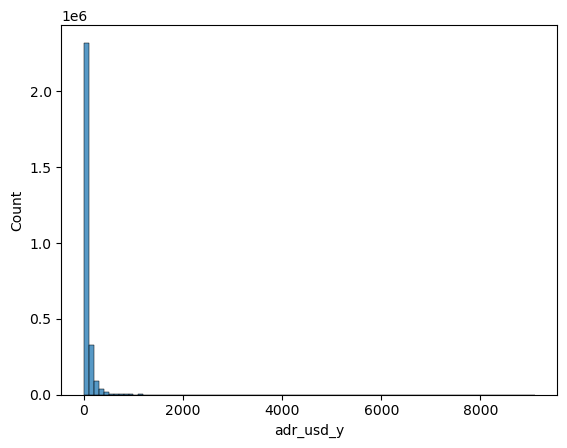

In [12]:
import seaborn as sns
sns.histplot(data=df, x="adr_usd_y", binwidth=100)

<Axes: xlabel='adr_usd_y', ylabel='Count'>

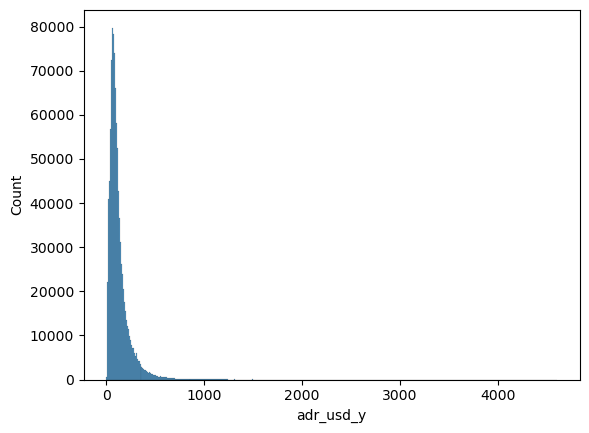

In [13]:
lb = 1
ub = 5000
df_model = df.loc[(df["adr_usd_y"]>=lb) & (df["adr_usd_y"]<=ub)]
sns.histplot(data = df_model, x="adr_usd_y", binwidth=10)

In [14]:
# Filter the DataFrame to include only rows where "rating" is missing
missing_rating = df[df['rating'].isnull()]

# Count the number of unique "supply_id" in the subset
unique_supply_ids = missing_rating['supply_id'].nunique()

print("Number of unique supply_id corresponding to missing values in 'rating':", unique_supply_ids)

# Calculate the total number of unique supply_ids in the dataset
total_unique_supply_ids = df['supply_id'].nunique()

# Calculate the percentage of unique supply_ids corresponding to missing values in 'rating'
percentage_unique_missing_ratings = (unique_supply_ids / total_unique_supply_ids) * 100

print("Percentage of unique Airbnb listings with missing ratings:", percentage_unique_missing_ratings)



Number of unique supply_id corresponding to missing values in 'rating': 72989
Percentage of unique Airbnb listings with missing ratings: 50.419303141665054


In [15]:
from sklearn.impute import SimpleImputer

# Impute missing values for 'n_baths'
n_baths_imputer = SimpleImputer(strategy='median')
df['n_baths'] = n_baths_imputer.fit_transform(df[['n_baths']])

# Impute missing values for 'max_guests'
max_guests_imputer = SimpleImputer(strategy='median')
df['max_guests'] = max_guests_imputer.fit_transform(df[['max_guests']])

# Impute missing values for 'n_rooms'
n_rooms_imputer = SimpleImputer(strategy = 'median')
df['n_rooms'] = n_rooms_imputer.fit_transform(df[['n_rooms']])

#Input missing values in rating 56% as the mean of each subcategory under property_subtype
df['rating'] = df['rating'].fillna(df.groupby('property_subtype').rating.transform('median'))

In [16]:
df.rename(columns={'adr_usd_y': 'adr_usd'}, inplace=True)
df.rename(columns={'date_in_y': 'date_in'}, inplace=True)

### Variable Transformations (outlier removal)


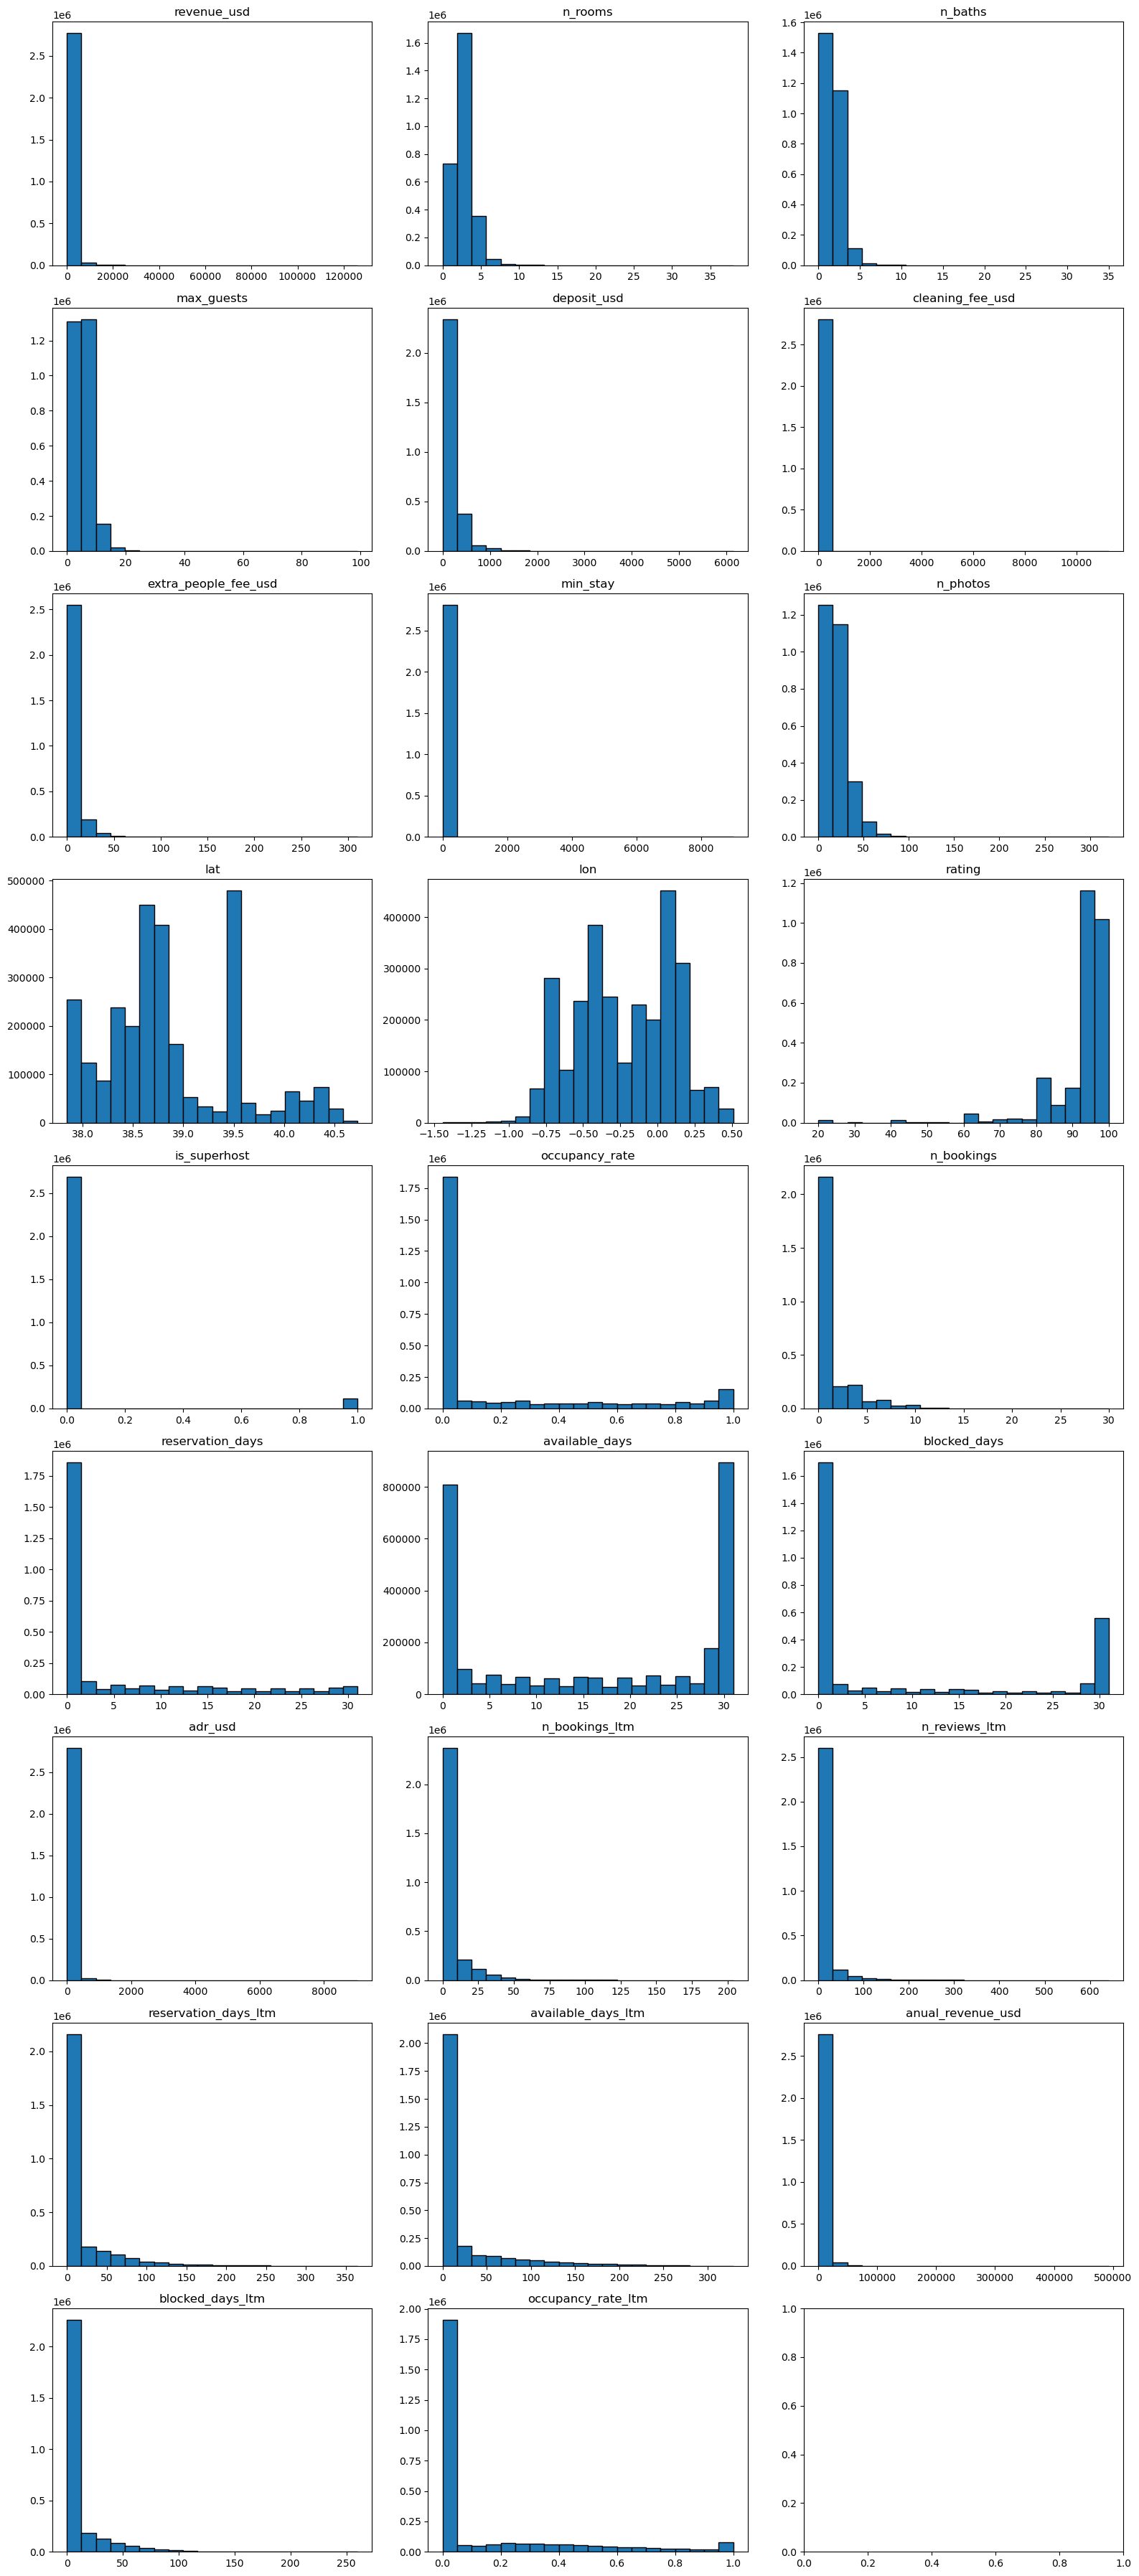

In [30]:
import matplotlib.pyplot as plt

numerical_types = ['int64', 'float64']

# Filter numerical columns
numerical_columns = df.select_dtypes(include=numerical_types).columns

# Determine the number of rows and columns for the subplot grid
num_rows = (len(numerical_columns) - 1) // 3 + 1
num_cols = min(len(numerical_columns), 3)

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

# Flatten the axes array if there is more than one row
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col], bins=20, edgecolor='black')
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

In [31]:
# Get only numeric variable names
numeric_variable_names = df.select_dtypes(include='number').columns.tolist()

# Display the list of numeric variable names
print(numeric_variable_names)

['revenue_usd', 'n_rooms', 'n_baths', 'max_guests', 'deposit_usd', 'cleaning_fee_usd', 'extra_people_fee_usd', 'min_stay', 'n_photos', 'lat', 'lon', 'rating', 'is_superhost', 'occupancy_rate', 'n_bookings', 'reservation_days', 'available_days', 'blocked_days', 'adr_usd', 'n_bookings_ltm', 'n_reviews_ltm', 'reservation_days_ltm', 'available_days_ltm', 'anual_revenue_usd', 'blocked_days_ltm', 'occupancy_rate_ltm']


In [32]:
from scipy.stats.mstats import winsorize

# List of variables to winsorize
variables_to_winsorize = ['revenue_usd', 'n_rooms', 'n_baths', 'max_guests', 'deposit_usd',
                          'cleaning_fee_usd', 'extra_people_fee_usd', 'min_stay', 'n_photos', 'lat', 
                          'lon', 'rating', 'occupancy_rate', 'n_bookings', 
                          'reservation_days', 'available_days', 'blocked_days', 'n_bookings_ltm', 'n_reviews_ltm', 'reservation_days_ltm', 'available_days_ltm', 'anual_revenue_usd', 'blocked_days_ltm', 'occupancy_rate_ltm']

# Create a copy of df
df_win = df.copy(deep=True)

# Loop through the variables and winsorize each one
for var in variables_to_winsorize:
    # Winsorize on the right-tail
    df_win[f'{var}_wins_95%'] = winsorize(df[var], limits=(0, 0.05))
    df_win[f'{var}_wins_925%'] = winsorize(df[var], limits=(0, 0.075))

    # Skewness of the winsorized versions
    skewness_95 = df_win[f'{var}_wins_95%'].skew()
    skewness_925 = df_win[f'{var}_wins_925%'].skew()

    # Determine which winsorized version has a lower skewness
    better_winsorized_version = f'{var}_wins_95%' if skewness_95 < skewness_925 else f'{var}_wins_925%'

    # Replace the original variable with the better winsorized version
    df[var] = df_win[better_winsorized_version]

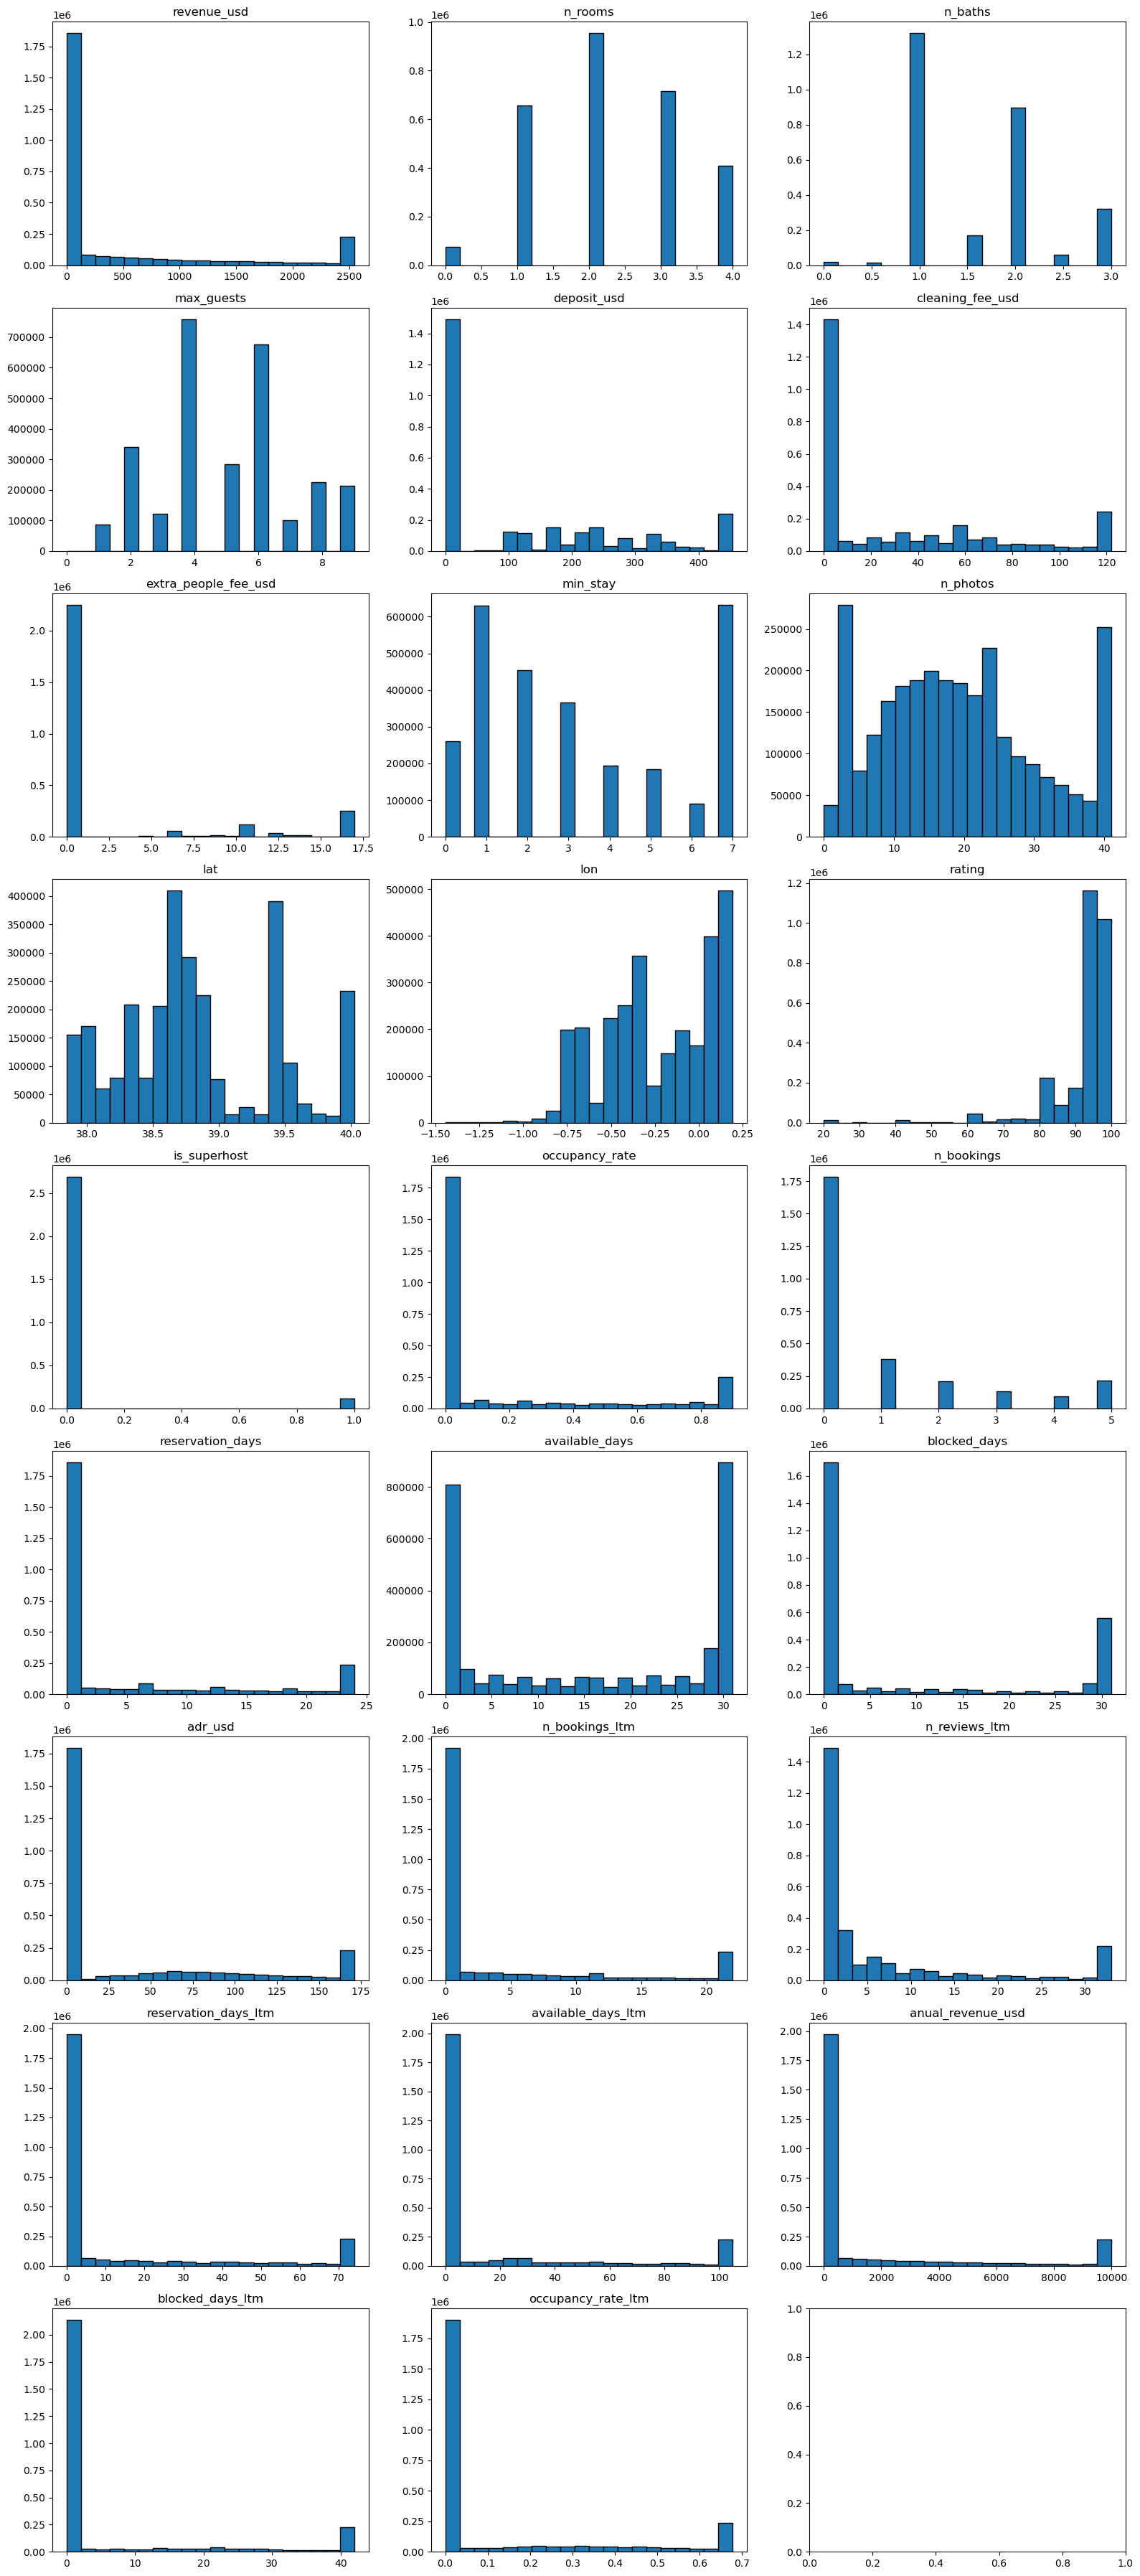

In [33]:
import matplotlib.pyplot as plt

numerical_types = ['int64', 'float64']

# Filter numerical columns
numerical_columns = df.select_dtypes(include=numerical_types).columns

# Determine the number of rows and columns for the subplot grid
num_rows = (len(numerical_columns) - 1) // 3 + 1
num_cols = min(len(numerical_columns), 3)

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

# Flatten the axes array if there is more than one row
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col], bins=20, edgecolor='black')
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

### Price Processing


In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,5)) 
ax = sns.histplot(df['adr_usd'], color='#FF585D')
ax.set_title('Price Distribution Per Night', fontsize=20);
ax.set_xlabel('Price', fontsize=15);
plt.savefig('price', bbox_inches ='tight', dpi = 400)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# Distribution of Prices Under $150
ax0 = sns.histplot(df[(df['adr_usd'] > 0) & (df['adr_usd'] <= 150)]['adr_usd'], color='#FF585D', ax=axs[0], kde=False)
ax0.set_title('Distribution of Prices Under $150')
ax0.set_xlabel('Price (USD)')
ax0.set_ylabel('Frequency')

# Distribution of Prices Over $150
ax1 = sns.histplot(df[df['adr_usd'] > 150]['adr_usd'], color='#FF585D', ax=axs[1], kde=False)
ax1.set_title('Distribution of Prices Over $150')
ax1.set_xlabel('Price (USD)')
ax1.set_ylabel('Frequency')

plt.show()

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

In [ ]:
df.rename(columns={'adr_usd_y': 'adr_usd'}, inplace=True)
df.rename(columns={'date_in_y': 'date_in'}, inplace=True)

In [ ]:
df[df['adr_usd'] > 300].shape

In [17]:
df['adr_usd'].nlargest(25)

2313832    9048.00
328909     7083.19
352417     6202.00
352418     6105.00
352421     5985.15
1663922    5886.50
352404     5851.50
2444805    5693.67
2444811    5651.67
2444807    5560.00
2444804    5524.28
2274362    5163.67
2107864    4593.50
2595396    4557.40
2107869    4535.00
352407     4397.00
2085205    4290.12
2611544    4241.00
2397712    4145.42
2397690    4065.82
2085199    4012.89
353974     3799.18
2595400    3717.08
285023     3632.07
976825     3365.00
Name: adr_usd, dtype: float64

### Monthly Activity

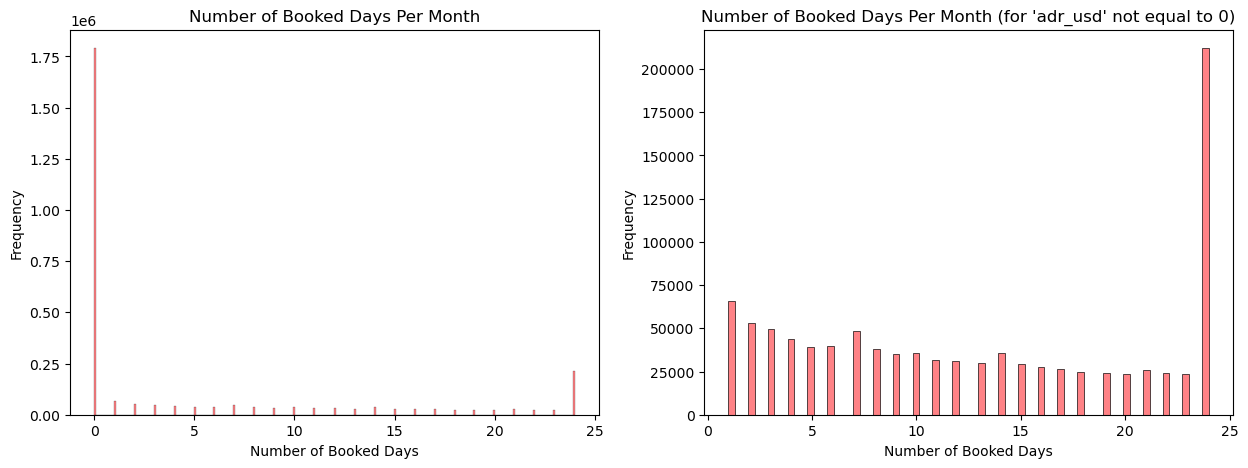

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of Booked Days Per Month
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['reservation_days'], color='#FF585D', kde=False)
plt.title("Number of Booked Days Per Month")
plt.xlabel("Number of Booked Days")
plt.ylabel("Frequency")

# Number of Booked Days Per Month (for 'adr_usd' not equal to 0)
plt.subplot(1, 2, 2)
sns.histplot(df[df['adr_usd'] != 0]['reservation_days'], color='#FF585D', kde=False)
plt.title("Number of Booked Days Per Month (for 'adr_usd' not equal to 0)")
plt.xlabel("Number of Booked Days")
plt.ylabel("Frequency")

plt.show()


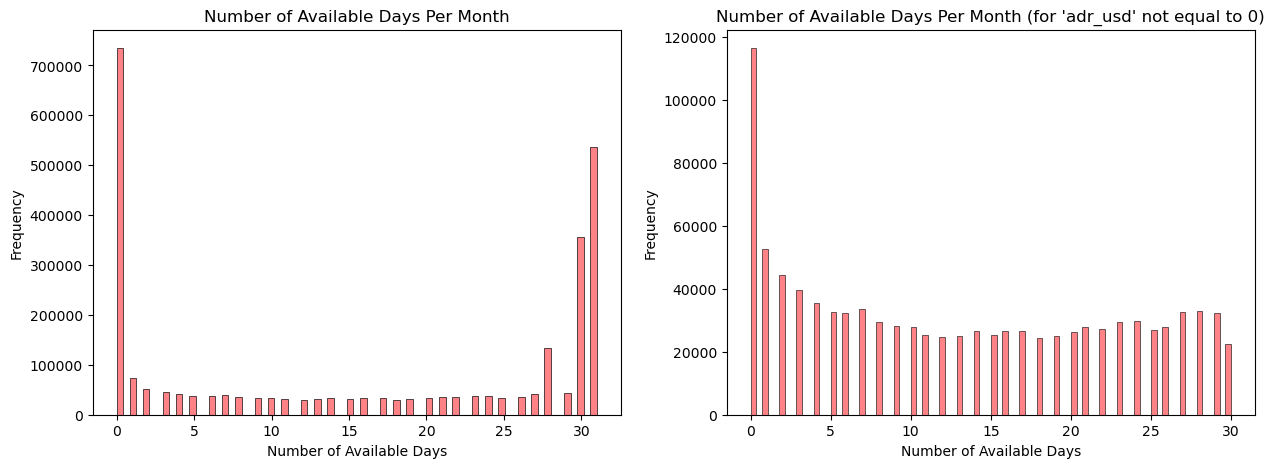

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of Available Days Per Month
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['available_days'], color='#FF585D', kde=False)
plt.title("Number of Available Days Per Month")
plt.xlabel("Number of Available Days")
plt.ylabel("Frequency")

# Number of Available Days Per Month (for 'adr_usd' not equal to 0)
plt.subplot(1, 2, 2)
sns.histplot(df[df['adr_usd'] != 0]['available_days'], color='#FF585D', kde=False)
plt.title("Number of Available Days Per Month (for 'adr_usd' not equal to 0)")
plt.xlabel("Number of Available Days")
plt.ylabel("Frequency")

plt.show()


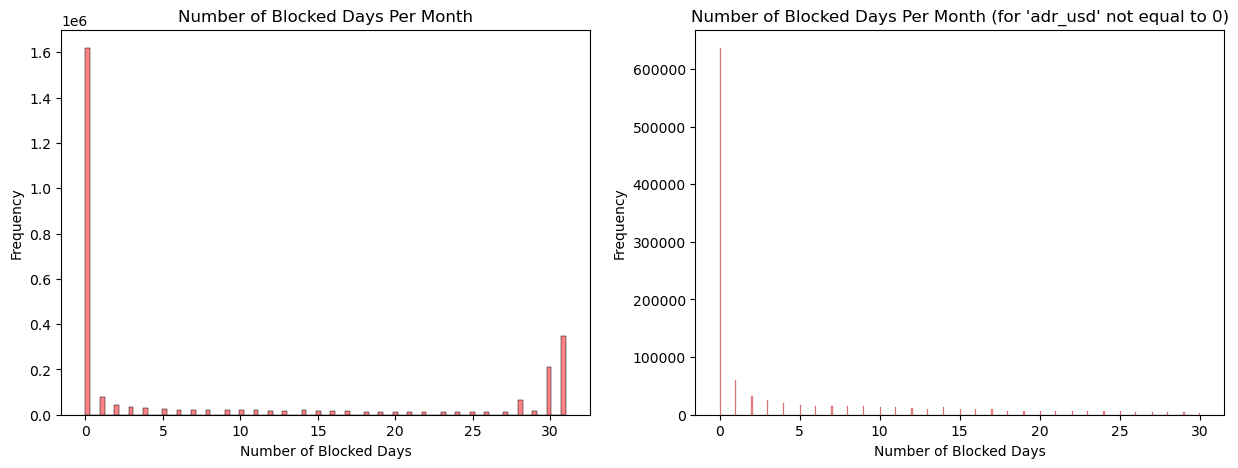

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of Blocked Days Per Month
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['blocked_days'], color='#FF585D', kde=False)
plt.title("Number of Blocked Days Per Month")
plt.xlabel("Number of Blocked Days")
plt.ylabel("Frequency")

# Number of Blocked Days Per Month (for 'adr_usd' not equal to 0)
plt.subplot(1, 2, 2)
sns.histplot(df[df['adr_usd'] != 0]['blocked_days'], color='#FF585D', kde=False)
plt.title("Number of Blocked Days Per Month (for 'adr_usd' not equal to 0)")
plt.xlabel("Number of Blocked Days")
plt.ylabel("Frequency")

plt.show()


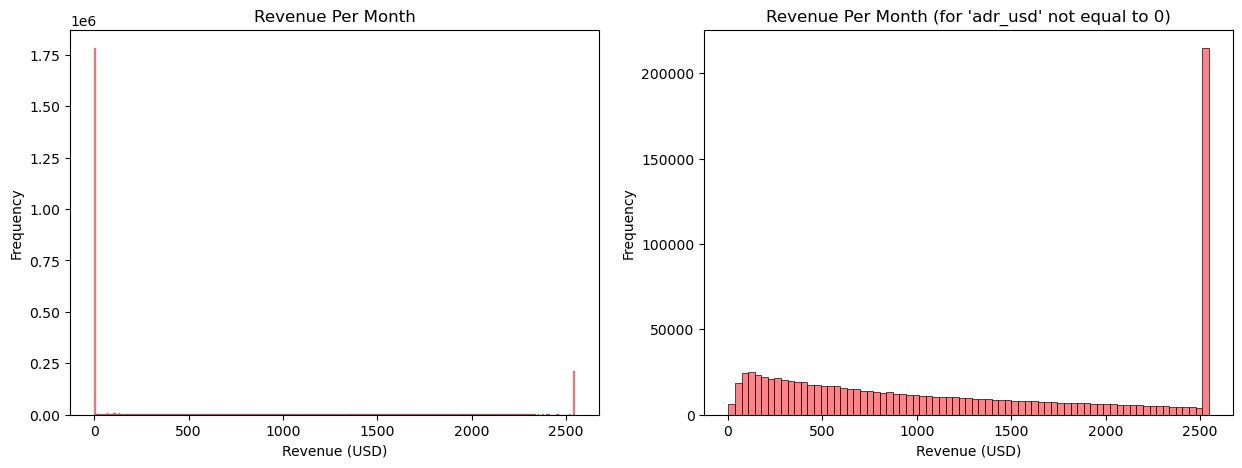

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Revenue Per Month
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['revenue_usd'], color='#FF585D', kde=False)
plt.title("Revenue Per Month")
plt.xlabel("Revenue (USD)")
plt.ylabel("Frequency")

# Revenue Per Month (for 'adr_usd' not equal to 0)
plt.subplot(1, 2, 2)
sns.histplot(df[df['adr_usd'] != 0]['revenue_usd'], color='#FF585D', kde=False)
plt.title("Revenue Per Month (for 'adr_usd' not equal to 0)")
plt.xlabel("Revenue (USD)")
plt.ylabel("Frequency")

plt.show()


### Additional Features | Amenities

In [18]:
df["additional_fields"].iloc[0]

'{"Neighborhood":"","Metropolitan Statistical Area":"","Response Rate":"90","Airbnb Response Time (Text)":"within a few hours","Check-in Time":"After 4:00 PM","Checkout Time":"10:00 AM","Listing Main Image URL":"https://a0.muscache.com/im/pictures/be117d58-41d5-4b01-a867-9a029d17bb94.jpg?aki_policy=x_large","Airbnb Communication Rating":"9","Airbnb Accuracy Rating":"9","Airbnb Cleanliness Rating":"10","Airbnb Checkin Rating":"10","Airbnb Location Rating":"10","Airbnb Value Rating":"10","Pets Allowed":"True","Integrated Property Manager":"","Amenities":"[\\"ac\\", \\"cable\\", \\"fireplace\\", \\"heating\\", \\"iron\\", \\"tv\\", \\"washer\\", \\"pool\\", \\"kitchen\\"]","HomeAway Location Type":"","Airbnb Property Plus":"False","Airbnb Home Collection":"","Airbnb Property ID":"15380248","Airbnb Host ID":"96807664","HomeAway Property ID":"10529389ha","HomeAway Property Manager ID":""}'

In [19]:
import pandas as pd
import json

from pandas import json_normalize  # Add this import

# Parse the JSON data and create new columns
df['additional_fields'] = df['additional_fields'].apply(json.loads)

# Create new columns for each key in the JSON data
df = pd.concat([df.drop(['additional_fields'], axis=1), df['additional_fields'].apply(pd.Series)], axis=1)

# # If 'Amenities' is a key in the JSON, parse it with json_normalize
# if 'Amenities' in df.columns:
#     df = pd.concat([df, json_normalize(df['Amenities'].apply(lambda x: json.loads(x.replace('\\"', '"')) if pd.notnull(x) and x.startswith('[') and x.endswith(']') else []))], axis=1)

# # Display the resulting DataFrame
# print(df)




In [20]:
df.applymap(lambda x: x is None or (isinstance(x, str) and x.strip() == '')).sum()

supply_id                             0
date_in                               0
revenue_usd                           0
n_rooms                               0
n_baths                               0
                                 ...   
Airbnb Home Collection          2808810
Airbnb Property ID               857201
Airbnb Host ID                   858380
HomeAway Property ID            1734138
HomeAway Property Manager ID    2603291
Length: 61, dtype: int64

In [21]:
df = df.drop(columns = ['Neighborhood', 'Metropolitan Statistical Area', 'Response Rate', 'Airbnb Home Collection',
                   'Airbnb Response Time (Text)', 'Check-in Time', 'Checkout Time', 'Airbnb Property Plus',
                  'Airbnb Communication Rating', 'Airbnb Accuracy Rating', 'Airbnb Cleanliness Rating', 'Airbnb Checkin Rating',
                  'Airbnb Location Rating', 'Airbnb Value Rating', 'Pets Allowed', 'Integrated Property Manager', 
                  'HomeAway Location Type', 'Airbnb Property ID', 'Airbnb Host ID', 'HomeAway Property ID', 'HomeAway Property Manager ID'], axis=1)

In [22]:
# Aplicar la función lambda
mask = df.applymap(lambda x: x is None or (isinstance(x, str) and x.strip() == ''))
import numpy as np

# Asignar NaN a las celdas que cumplen con la condición
df[mask] = np.nan

In [23]:
df.isnull().sum()

supply_id                     0
date_in                       0
revenue_usd                   0
n_rooms                       0
n_baths                       0
max_guests                    0
calendar_last_updated     20715
cancelation_policy        10366
deposit_usd                   0
cleaning_fee_usd              0
extra_people_fee_usd          0
min_stay                      0
n_photos                      0
is_instantbookable            0
lat                           0
lon                           0
rating                        0
is_superhost                  0
operation_type                0
operation_subtype             0
property_type                 0
property_subtype              0
property_use                  0
geo_id                        0
occupancy_rate                0
n_bookings                    0
reservation_days              0
available_days                0
blocked_days                  0
adr_usd                       0
last_scrapped_date            0
n_bookin

In [24]:
df = df.dropna(subset=['Amenities', 'Listing Main Image URL'])


In [25]:
df['Amenities'].iloc[100009]

'["ac", "cable", "fireplace", "heating", "hot_water", "iron", "tv", "washer", "wireless_internet", "free_parking", "kitchen", "host_checkin", "hangers"]'

In [26]:
import pandas as pd
from ast import literal_eval

# Supongamos que tienes un DataFrame df con la columna 'Amenities'
# Reemplaza 'Amenities' con el nombre real de tu columna

# Convertir la representación de cadena de la lista a una lista real
df['Amenities'] = df['Amenities'].apply(literal_eval)

# Obtener el conjunto de todas las amenidades únicas en todo el conjunto de datos
all_amenities = pd.Series(df['Amenities'].explode()).value_counts().nlargest(15).index

# Crear un DataFrame para almacenar las variables dummy
amenities_dummies = pd.DataFrame()

# Crear dummy variables solo para las 10 amenidades más frecuentes
for amenity in all_amenities:
    amenities_dummies[amenity] = df['Amenities'].apply(lambda x: amenity in x).astype(int)

# Concatenar las variables dummy con el DataFrame original
df = pd.concat([df, amenities_dummies], axis=1)

# Ahora, df contiene dummy variables solo para las 10 amenidades más frecuentes


In [27]:
df['Listing Main Image URL'].iloc[50]

'https://a0.muscache.com/im/pictures/be117d58-41d5-4b01-a867-9a029d17bb94.jpg?aki_policy=x_large'

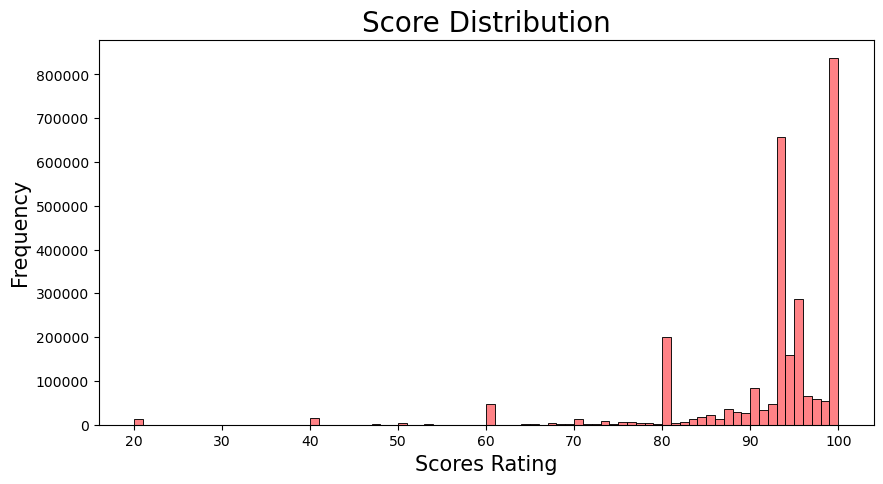

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.histplot(df['rating'], color='#FF585D', kde=False, binwidth=1)  # Adjust binwidth as needed
ax.set_title('Score Distribution', fontsize=20)
ax.set_xlabel("Scores Rating", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)

plt.show()



# EDA

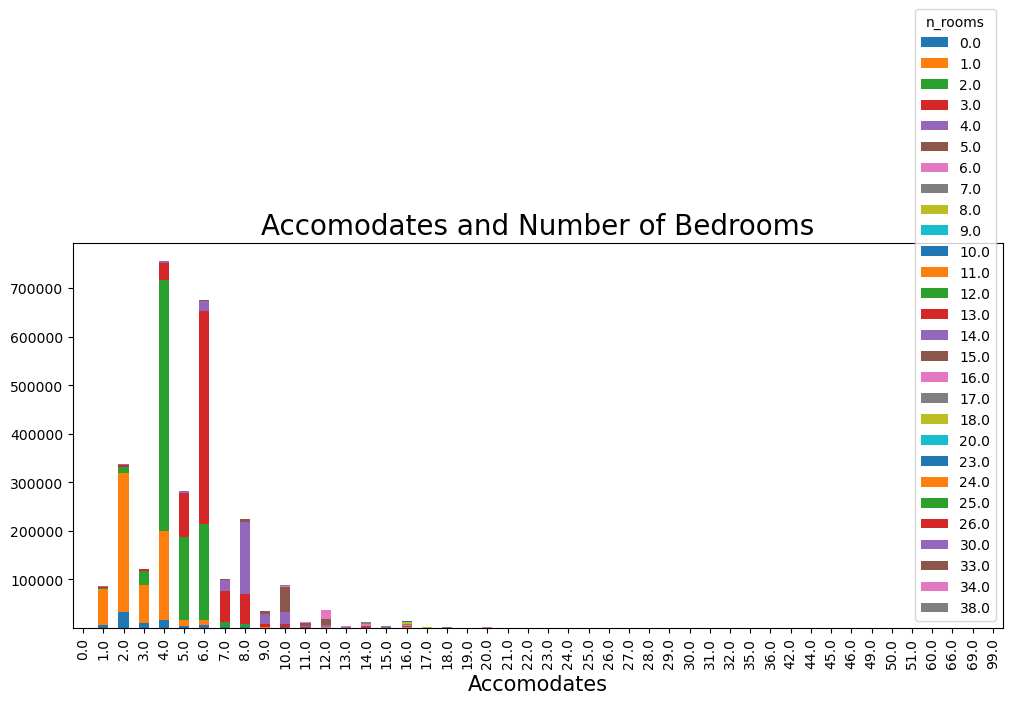

In [29]:
model1_plot = df.groupby(['max_guests', 'n_rooms']).size().reset_index().pivot(columns='n_rooms',
                                                                                  index='max_guests', values=0)

model1_plot.plot(kind='bar', stacked=True, figsize=(12,5))
plt.title("Accomodates and Number of Bedrooms", size=20)
plt.xlabel("Accomodates", size=15);

### Security Deposit

In [30]:
df['deposit_usd'].describe()

count    2.794258e+06
mean     1.490853e+02
std      2.583272e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.270000e+02
max      6.141000e+03
Name: deposit_usd, dtype: float64

In [31]:
df['deposit_usd'].nlargest(100)

1244235    6141
1244236    6141
1244237    6141
1244238    6141
1244239    6141
           ... 
2139805    5278
2139806    5278
2139807    5278
2139808    5278
2139809    5278
Name: deposit_usd, Length: 100, dtype: int64

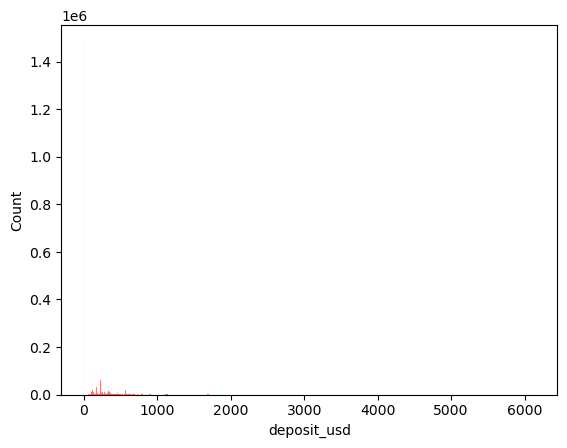

In [32]:
sns.histplot(df['deposit_usd'], color='#FF5A5F');

### Property Type

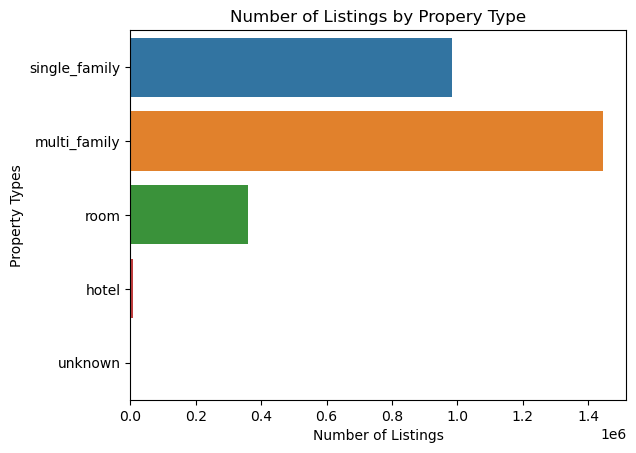

In [33]:
sns.countplot(y=df['property_type'])
plt.ylabel('Property Types')
plt.xlabel('Number of Listings')
plt.title('Number of Listings by Propery Type');

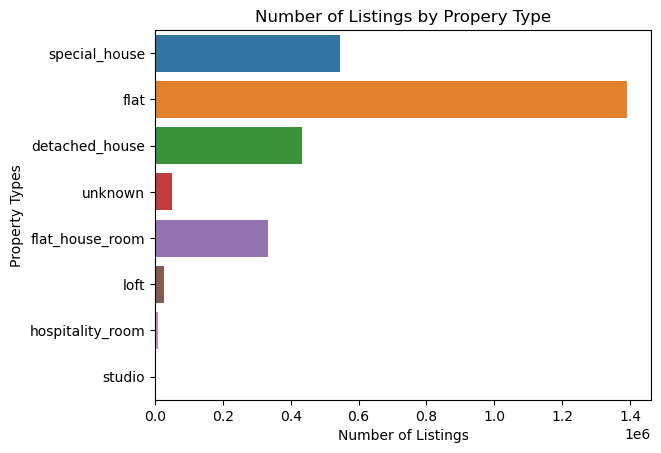

In [34]:
sns.countplot(y=df['property_subtype'])
plt.ylabel('Property Types')
plt.xlabel('Number of Listings')
plt.title('Number of Listings by Propery Type');

### Geo ID. Province and Municipality

In [35]:
import pandas as pd
import os

folder_name = "Datasets"
file_name = "geo_id_correspondence.csv"
file_path = os.path.join(folder_name, file_name)

# Use pd.read_csv to read the CSV file
geo_id_correspondence = pd.read_csv(file_path)

In [36]:
df['geo_id'] = df['geo_id'].str[:14]

In [37]:
# Perform the join
df = pd.merge(df, geo_id_correspondence[['geo_id', 'Province', 'Municipality']], on='geo_id', how='left')

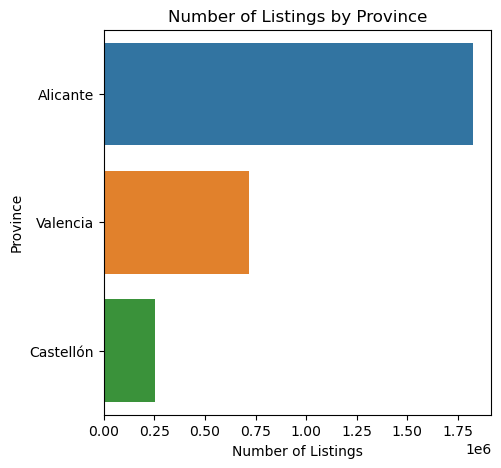

In [38]:
fig, ax = plt.subplots(figsize=(5,5)) 

ax = sns.countplot(y=df['Province'])
plt.ylabel('Province')
plt.xlabel('Number of Listings')
plt.title('Number of Listings by Province');

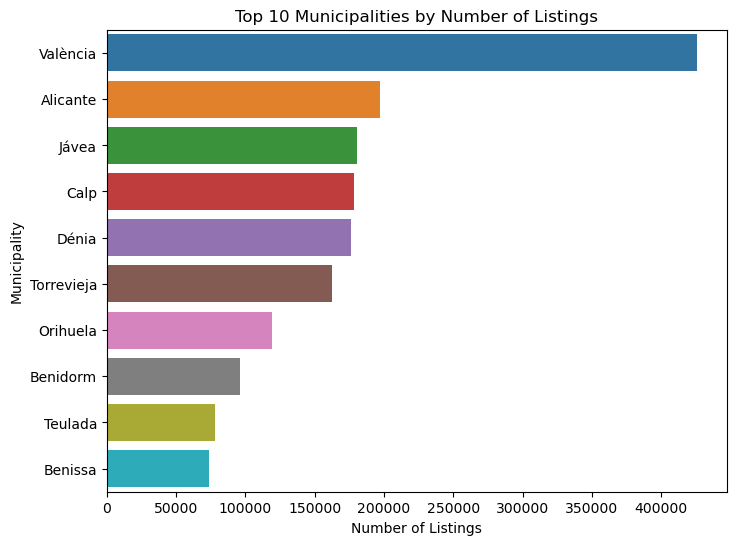

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(y=df['Municipality'], order=df['Municipality'].value_counts().nlargest(10).index)

plt.xlabel('Number of Listings')
plt.title('Top 10 Municipalities by Number of Listings')

plt.show()


In [40]:
df.to_csv('Data_with_amenities.csv', index=False)

### ADDING DISTANCE TO BEACH FEATURE

In [2]:
import pandas as pd
import os
folder_name = "Datasets"
file_name = "df_beaches.csv"
file_path = os.path.join(folder_name, file_name)

# Use pd.read_csv to read the CSV file
df_beaches = pd.read_csv(file_path)


In [3]:
# Define the output Excel file name
output_excel_file = "df_beaches.xlsx"

# Define the output Excel file path
output_excel_path = os.path.join(folder_name, output_excel_file)

# Export the DataFrame to Excel
df_beaches.to_excel(output_excel_path, index=False)

In [42]:
dataframe_for_distances = df[['supply_id', 'lat', 'lon']]
unique_airbnbs = dataframe_for_distances.drop_duplicates(subset='supply_id')

In [43]:
import pandas as pd
from geopy.distance import great_circle

# Define the function to calculate distance to the closest beach
def get_distance_to_closest_beach(row):
    airbnb_location = (row['lat'], row['lon'])
    closest_beach = min(df_beaches.itertuples(), key=lambda beach: great_circle(airbnb_location, (beach.Latitude, beach.Longitude)).meters)
    distance_to_closest_beach = great_circle(airbnb_location, (closest_beach.Latitude, closest_beach.Longitude)).meters
    return distance_to_closest_beach

# Apply the function to the entire DataFrame and create a new column with the distances
unique_airbnbs['distance_to_closest_beach'] = unique_airbnbs.apply(get_distance_to_closest_beach, axis=1)

# Display the DataFrame with the new distances column
print(unique_airbnbs)

            supply_id        lat       lon  distance_to_closest_beach
0         ab-15380248  38.737680  0.208650                 832.429701
144       ab-32650183  38.847000  0.101000                1432.583675
152       ab-19518027  38.132000 -0.676000                3030.270384
181       ab-36991482  38.648030  0.043090                2667.430494
186       ab-26758765  38.571660 -0.069690                1034.052101
...               ...        ...       ...                        ...
2794164  ha-8619113ha  38.649438  0.073436                  96.667472
2794184  ha-2914090ha  38.597739 -0.144300                6840.243415
2794191  ha-8733210ha  38.560946 -0.074821                2283.091832
2794198  ha-6919819ha  37.904590 -0.831950               30204.294589
2794229  ha-1946426ha  38.840130  0.107112                2350.709739

[143739 rows x 4 columns]


C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_12032\2316690882.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_airbnbs['distance_to_closest_beach'] = unique_airbnbs.apply(get_distance_to_closest_beach, axis=1)


In [44]:
df_with_distancetobeach = pd.merge(df, unique_airbnbs[['supply_id', 'distance_to_closest_beach']], on='supply_id', how='left')

In [45]:
df_with_distancetobeach.head()


,supply_id,date_in,revenue_usd,n_rooms,n_baths,max_guests,calendar_last_updated,cancelation_policy,deposit_usd,cleaning_fee_usd,...,ac,pool,hair-dryer,free_parking,hot_water,elevator,laptop-friendly,Province,Municipality,distance_to_closest_beach
0,ab-15380248,2019-04-01,3762.86,3.0,2.0,8.0,2019-08-30,super_strict_60,562,550,...,1,1,0,0,0,0,0,Alicante,Jávea,832.429701
1,ab-15380248,2017-10-01,3462.56,3.0,2.0,8.0,2019-08-30,super_strict_60,562,550,...,1,1,0,0,0,0,0,Alicante,Jávea,832.429701
2,ab-15380248,2017-08-01,10477.57,3.0,2.0,8.0,2019-08-30,super_strict_60,562,550,...,1,1,0,0,0,0,0,Alicante,Jávea,832.429701
3,ab-15380248,2017-06-01,5826.33,3.0,2.0,8.0,2019-08-30,super_strict_60,562,550,...,1,1,0,0,0,0,0,Alicante,Jávea,832.429701
4,ab-15380248,2018-06-01,6854.40,3.0,2.0,8.0,2019-08-30,super_strict_60,562,550,...,1,1,0,0,0,0,0,Alicante,Jávea,832.429701


### Property Type and Subtype imputing the unknown

In [46]:
# Display the frequency of each category
property_type_counts = df_with_distancetobeach['property_type'].value_counts()

# Calculate the percentage of each category excluding 'unknown'
total_count = len(df_with_distancetobeach)
percentage_per_category = property_type_counts / total_count * 100

# Display the calculated percentages
print(percentage_per_category)

# Replace 'unknown' with a value based on the calculated percentages
replacement_value = percentage_per_category.idxmax()  # Replace with the most frequent category
df_with_distancetobeach['property_type'] = df_with_distancetobeach['property_type'].replace('unknown', replacement_value)

# Verify the changes
df_with_distancetobeach['property_type'].value_counts()


property_type
multi_family     51.701489
single_family    35.159388
room             12.847418
hotel             0.264220
unknown           0.027485
Name: count, dtype: float64


property_type
multi_family     1445441
single_family     982444
room              358990
hotel               7383
Name: count, dtype: int64

In [47]:
# Display the frequency of each category
property_subtype_counts = df_with_distancetobeach['property_subtype'].value_counts()

# Calculate the percentage of each category excluding 'unknown'
total_count = len(df_with_distancetobeach)
percentage_per_category = property_subtype_counts / total_count * 100

# Display the calculated percentages
print(percentage_per_category)

# Replace 'unknown' with a value based on the calculated percentages
replacement_value = percentage_per_category.idxmax()  # Replace with the most frequent category
df_with_distancetobeach['property_subtype'] = df_with_distancetobeach['property_subtype'].replace('unknown', replacement_value)

# Verify the changes
df_with_distancetobeach['property_subtype'].value_counts()

property_subtype
flat                49.824247
special_house       19.538819
detached_house      15.539081
flat_house_room     11.915578
unknown              1.796291
loft                 0.986953
hospitality_room     0.352008
studio               0.047025
Name: count, dtype: float64


property_subtype
flat                1442411
special_house        545965
detached_house       434202
flat_house_room      332952
loft                  27578
hospitality_room       9836
studio                 1314
Name: count, dtype: int64

In [48]:
df_with_distancetobeach.to_csv('df_after_preprocessing.csv', index=False)

### DEALING WITH Cancelation policy, Property type and subtype FEATURES

In [49]:
import pandas as pd
import os

# Use pd.read_csv to read the CSV file
df = pd.read_csv('df_after_preprocessing.csv')
df.head()

,supply_id,date_in,revenue_usd,n_rooms,n_baths,max_guests,calendar_last_updated,cancelation_policy,deposit_usd,cleaning_fee_usd,...,ac,pool,hair-dryer,free_parking,hot_water,elevator,laptop-friendly,Province,Municipality,distance_to_closest_beach
0,ab-15380248,2019-04-01,3762.86,3.0,2.0,8.0,2019-08-30,super_strict_60,562,550,...,1,1,0,0,0,0,0,Alicante,Jávea,832.429701
1,ab-15380248,2017-10-01,3462.56,3.0,2.0,8.0,2019-08-30,super_strict_60,562,550,...,1,1,0,0,0,0,0,Alicante,Jávea,832.429701
2,ab-15380248,2017-08-01,10477.57,3.0,2.0,8.0,2019-08-30,super_strict_60,562,550,...,1,1,0,0,0,0,0,Alicante,Jávea,832.429701
3,ab-15380248,2017-06-01,5826.33,3.0,2.0,8.0,2019-08-30,super_strict_60,562,550,...,1,1,0,0,0,0,0,Alicante,Jávea,832.429701
4,ab-15380248,2018-06-01,6854.40,3.0,2.0,8.0,2019-08-30,super_strict_60,562,550,...,1,1,0,0,0,0,0,Alicante,Jávea,832.429701


In [50]:
import pandas as pd
import numpy as np
import json

# Assuming your DataFrame is named df
# You can replace 'your_column_name' with the actual name of your cancelation_policy column
column_name = 'cancelation_policy'

# Define a function to categorize policies
def categorize_policy(policy):
    if pd.isna(policy):
        return 'Unknown'

    policy_lower = str(policy).lower()

    if 'flexible' in policy_lower:
        return 'Flexible'
    elif 'moderate' in policy_lower:
        return 'Flexible'  # You can adjust this based on your criteria
    elif 'free cancellation' in policy_lower:
        if '48 hours' in policy_lower or 'firm' in policy_lower:
            return 'Strict'
        else:
            return 'Flexible'
    elif 'strict' in policy_lower or 'super strict' in policy_lower:
        return 'Strict'
    elif 'refund' in policy_lower:
        try:
            policy_data = json.loads(policy)
            if isinstance(policy_data, list):
                for period in policy_data:
                    if 'limitedTo' in period and 'refundPercent' in period:
                        time_limit = int(period['limitedTo'])
                        refund_percent = int(period['refundPercent'])

                        # Adjust these thresholds based on your criteria
                        if time_limit >= 14 and refund_percent >= 50:
                            return 'Flexible'
                        else:
                            return 'Strict'
            elif 'policyPeriods' in policy_data and isinstance(policy_data['policyPeriods'], list):
                for period in policy_data['policyPeriods']:
                    if 'limitedTo' in period and 'refundPercent' in period:
                        time_limit = int(period['limitedTo'])
                        refund_percent = int(period['refundPercent'])

                        # Adjust these thresholds based on your criteria
                        if time_limit >= 14 and refund_percent >= 50:
                            return 'Flexible'
                        else:
                            return 'Strict'
            else:
                return 'Unknown'
        except json.JSONDecodeError:
            return 'Unknown'
    elif 'firm' in policy_lower:
        return 'Strict'
    else:
        return 'Unknown'

# Apply the categorization function to the specified column
df['policy_category'] = df[column_name].apply(categorize_policy)

# Display the count of each category
print(df['policy_category'].value_counts())



policy_category
Strict      1314602
Flexible    1244982
Unknown      234674
Name: count, dtype: int64


In [51]:
total_count = len(df)
(df['policy_category'].value_counts()) / total_count * 100

policy_category
Strict      47.046550
Flexible    44.555012
Unknown      8.398437
Name: count, dtype: float64

In [52]:
df[['property_subtype']].value_counts()

property_subtype
flat                1442411
special_house        545965
detached_house       434202
flat_house_room      332952
loft                  27578
hospitality_room       9836
studio                 1314
Name: count, dtype: int64

In [53]:
df.drop(["calendar_last_updated", "cancelation_policy"], axis=1, inplace=True)

In [54]:
df.to_csv('df_for_informeOFERTA.csv', index=False)

# Preparing Data for Modeling

### Unifying it with the INE Data

Important, not all the municipalities in the supply dataset are present in the ine data, but those just account for a 15% of the total observations of the supply dataset, so we will keep only those that match

In [55]:
df_model = pd.read_csv('df_for_informeOFERTA.csv')
df_model.head()

,supply_id,date_in,revenue_usd,n_rooms,n_baths,max_guests,deposit_usd,cleaning_fee_usd,extra_people_fee_usd,min_stay,...,pool,hair-dryer,free_parking,hot_water,elevator,laptop-friendly,Province,Municipality,distance_to_closest_beach,policy_category
0,ab-15380248,2019-04-01,3762.86,3.0,2.0,8.0,562,550,0,1,...,1,0,0,0,0,0,Alicante,Jávea,832.429701,Strict
1,ab-15380248,2017-10-01,3462.56,3.0,2.0,8.0,562,550,0,1,...,1,0,0,0,0,0,Alicante,Jávea,832.429701,Strict
2,ab-15380248,2017-08-01,10477.57,3.0,2.0,8.0,562,550,0,1,...,1,0,0,0,0,0,Alicante,Jávea,832.429701,Strict
3,ab-15380248,2017-06-01,5826.33,3.0,2.0,8.0,562,550,0,1,...,1,0,0,0,0,0,Alicante,Jávea,832.429701,Strict
4,ab-15380248,2018-06-01,6854.40,3.0,2.0,8.0,562,550,0,1,...,1,0,0,0,0,0,Alicante,Jávea,832.429701,Strict


In [56]:
import pandas as pd
import os

folder_name = "Datasets"
file_name = "geo_id_correspondence.csv"
file_path = os.path.join(folder_name, file_name)

# Use pd.read_csv to read the CSV file
geo_id_correspondence = pd.read_csv(file_path)

df_model['geo_id'] = df_model['geo_id'].str[:14]

# Perform the join
df_model = pd.merge(df_model, geo_id_correspondence[['geo_id', 'Province', 'Municipality']], on='geo_id', how='left')

In [57]:
df_model['date_in'] = pd.to_datetime(df_model['date_in'])
df_model['month'] = df_model['date_in'].dt.month

In [58]:
df_model.columns

Index(['supply_id', 'date_in', 'revenue_usd', 'n_rooms', 'n_baths',
       'max_guests', 'deposit_usd', 'cleaning_fee_usd', 'extra_people_fee_usd',
       'min_stay', 'n_photos', 'is_instantbookable', 'lat', 'lon', 'rating',
       'is_superhost', 'operation_type', 'operation_subtype', 'property_type',
       'property_subtype', 'property_use', 'geo_id', 'occupancy_rate',
       'n_bookings', 'reservation_days', 'available_days', 'blocked_days',
       'adr_usd', 'last_scrapped_date', 'n_bookings_ltm', 'n_reviews_ltm',
       'reservation_days_ltm', 'available_days_ltm', 'anual_revenue_usd',
       'blocked_days_ltm', 'occupancy_rate_ltm', 'Listing Main Image URL',
       'Amenities', 'kitchen', 'washer', 'tv', 'essentials',
       'wireless_internet', 'hangers', 'iron', 'heating', 'ac', 'pool',
       'hair-dryer', 'free_parking', 'hot_water', 'elevator',
       'laptop-friendly', 'Province_x', 'Municipality_x',
       'distance_to_closest_beach', 'policy_category', 'Province_y',
    

In [59]:
df_model['Municipality'] = df_model['Municipality_y'] 
df_model['Province'] = df_model['Province_y'] 

In [60]:
df_model.to_csv("Data_tomerge_withINE.csv", index = False )


### Creating dummy variables for categorical variables"

In [ ]:
import pandas as pd
import os


# Use pd.read_csv to read the CSV file
df = pd.read_csv('df_for_informeOFERTA.csv')
df.head()

In [ ]:
# # List of unique municipalities
# new_names_array = ['Jávea', 'Dénia', 'San Fulgencio', 'Calp', "L' Alfàs del Pi", 'Alicante', 'Torrevieja', 'València', 'San Vicente del Raspeig', 'Benissanó', 'Quart de Poblet', 'Náquera', 'Finestrat', 'Altea', 'Orihuela', 'Beniardá', 'Gandia', 'Sagunto', 'Rojales', 'El Pinós', 'Castelló de la Plana', 'Pego', 'Alcalà de Xivert', 'Santa Pola', 'Teulada', 'Alboraya', 'Matet', 'Elche', 'Peñíscola', 'Alcoy', 'Rocafort', 'Sant Joanet', 'Pedreguer', 'Villajoyosa', 'Formentera del Segura', 'Vinaròs', 'Algorfa', 'Benidorm', 'Bellreguard', 'Oropesa del Mar', 'Guardamar del Segura', 'El Campello', 'Oliva', 'Pilar de la Horadada', 'Benicasim', 'Mutxamel', 'Alzira', 'San Miguel de Salinas', 'Burriana', 'Canet lo Roig', 'Emperador', 'Càlig', 'Ontinyent', 'Vilamarxant', 'Xirivella', 'Godella', 'Suera', 'Culla', 'Benaguasil', 'Cabanes', 'Gata de Gorgos', 'Benagéber', 'Paterna', 'Benifato', 'Montserrat', 'Chella', 'Artana', 'La Nucia', 'Beniarbeig', 'Xaló', 'Silla', 'Chilches', 'Monóvar', 'Daimús', "L' Alcora", 'La Pobla de Farnals', "La Font d'En Carròs", 'Hondón de las Nieves', 'Borriol', 'Millena', 'Godelleta', 'Tavernes de la Valldigna', 'Xeresa', 'Villalonga', 'Mislata', "L' Eliana", 'Puçol', 'Cocentaina', 'Bétera', 'Polop', 'Xàtiva', 'Jijona', 'Torreblanca', 'Requena', 'Palmera', 'Lucena del Cid', 'Orba', 'Picanya', 'Vallibona', 'Massamagrell', 'Benigànim', 'Monforte del Cid', 'El Puig de Santa Maria', 'Meliana', 'Busot', 'Elda', 'Dolores', 'Castalla', 'Turís', 'Tormos', 'Llíria', 'Torrent', 'Cox', 'Ondara', 'Picassent', 'Albaida', 'Albalat dels Sorells', 'Manuel', 'Catarroja', 'Serra', 'Ayora', 'Loriguilla', 'Burjassot', 'Biar', 'Aspe', "Callosa d'en Sarrià", 'Real', 'Villafranca del Cid', 'Onil', 'Cheste', 'Buñol', 'Almoradí', 'Alcàsser', 'Sedaví', 'Paiporta', 'Manises', 'Petrer', 'Alquerías del Niño Perdido', 'Bocairent', 'Nules', 'Segorbe', 'Bigastro', 'Muro de Alcoy', 'Viver', 'Chelva', 'Massalfassar', 'Llombai', 'Morella', 'Salinas', 'Beniarrés', 'Navarrés', 'Altura', 'Benetússer', 'Soneja', 'Catí', 'Venta del Moro', 'Alaquàs', 'Rótova', 'Almenara', "Vall d'Alba", "L' Olleria", 'Rafelbunyol', 'Pedralba', 'Benilloba', 'Benifairó de la Valldigna', 'Foios', 'Almassora', 'Alfafar', "La Vall d'Uixó", 'Aldaia', 'Moncada', 'Vila-real', 'Carcaixent', 'Alberic', 'Algemesí', 'Crevillent', 'Canals', 'Catadau', 'Albuixech', 'Yátova', 'Quesa', 'Alginet', 'Redován', "L' Alcúdia de Crespins", 'Almussafes', 'Llutxent', 'San Isidro', 'Mogente', 'Benifairó de les Valls', 'Novelda', 'Riola', 'Anna', 'Corbera', 'Carlet', 'Cofrentes', 'Benejúzar', 'Beniparrell', 'Callosa de Segura', 'Agost', 'Gaibiel', 'Benirredrà', 'Ademuz', 'Utiel', "L' Alcúdia", 'Villar del Arzobispo', 'Estivella', 'Guadassuar', 'Favara', 'Villanueva de Castellón', 'Aielo de Malferit', 'Traiguera', 'Aín', 'Rotglà i Corberà', 'Betxí', 'Rafal', 'Benifallim', 'Montaverner']

# # Filter the dataset based on the new names array
# filtered_dataset = df[df['Municipality'].isin(new_names_array)]

# # Calculate the percentage
# percentage_representation = (len(filtered_dataset['Municipality']) / len(df['Municipality'])) * 100

# # Display the result
# print(f"The new names represent approximately {percentage_representation:.2f}% of the total unique municipalities in the dataset.")

In [ ]:
df_model = df

In [ ]:
dummy_df = pd.get_dummies(df_model['property_type'], prefix='property_type', dtype = int)

# Concatenate the dummy variables with the original DataFrame
df_model= pd.concat([df_model, dummy_df], axis=1)

# Drop the original 'property_type' column if needed
df_model= df_model.drop('property_type', axis=1)

In [ ]:
dummy_df = pd.get_dummies(df_model['policy_category'], prefix='policy_category', dtype = int)

# Concatenate the dummy variables with the original DataFrame
df_model= pd.concat([df_model, dummy_df], axis=1)

# Drop the original 'property_type' column if needed
df_model= df_model.drop('policy_category', axis=1)

### Dropping unnecessary variables for modeling

In [ ]:
df_model.drop(['operation_type', 'operation_subtype', 'geo_id', 'last_scrapped_date', 'Listing Main Image URL', 'Amenities'], axis=1)